In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import pickle as pk
import pickle

### Functions



In [3]:
def savefig(ddir,filename):
    
    plt.savefig(ddir+filename+".png") # save plot as png-file 
    return print('File successful saved as:', filename)

def DensityPlot(meanDensity,title, #s_lon,s_lat, 
                extent=[27, 42, 40, 47], colormap = 'jet'
                   ):

    proj = ccrs.PlateCarree()
    fig= plt.figure(figsize = (30 ,30))

    ax= fig.add_subplot(projection=proj)

    ax.set_title(title, fontsize = 25, weight = 'bold')
    ax.set_extent(extent, crs = proj)
    
    lon = np.arange(27,42,0.1)
    lat = np.arange(41,48,0.1)
    Lat, Lon = np.meshgrid(lat, lon)
    
    masked_density = np.ma.masked_where(meanDensity==0.0, meanDensity)
    
    density = ax.pcolormesh(Lon, Lat,masked_density, 
                            cmap = colormap, 
                            norm=colors.SymLogNorm(linthresh=0.03,vmin= masked_density.min(),vmax= 10),
                            zorder=0.01, transform = proj) 
    
    #ax.scatter(s_lon, s_lat, c = 'palevioletred', zorder = 350, s = 350)       
    
    cbar = fig.colorbar(density, ax=ax, shrink=0.40, pad=0.015, extend='both', )
    cbar.set_label('Average plastic[particles/km^2]', rotation=90, size='xx-large', labelpad = 18)
    cbar.ax.tick_params(labelsize=18)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, 
                      linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xlabels_bottom = True
    gl.ylabel_style = {'weight': 'bold', 'size' : 15}
    gl.xlabel_style = {'weight': 'bold', 'size': 15}


    #Add features
    
    land_10m = cfeat.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',
                                          #facecolor=cfeat.COLORS['land']
                                        facecolor = 'lightgray')
    ax.add_feature(land_10m)
    ax.coastlines('10m')
    #ax.add_feature(f.GSHHSFeature('full'))
    

    ax.text(-0.035, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 20)
    ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 20)
    
    return fig

### Load Data


In [4]:
ddir = r'C:\Users\Administrateur\Documents\CP_18-20\Thesis\Parcels'
outdir = r'C:\Users\Administrateur\Documents\CP_18-20\Thesis\Figure'

files = [ddir + '\Density\DRun1', 
         ddir + '\Density\DRun2', 
         ddir + '\Density\DRun4']
       
dsty = []
       
for file in files:
    Dsty = pk.load(open(file, 'rb'))
    dsty.append(Dsty)
    
for i in range(len(dsty)):
    dsty[i][np.isnan(dsty[i])]=0 

MD = [np.mean(dsty[i], axis=0) for i in range(len(dsty))] #calculate the mean density



In [5]:
titles = ['Surface currents', 'Surface current + Stokes Drift', 
     'Surface currents + Stokes Drift + Brownian Motion']

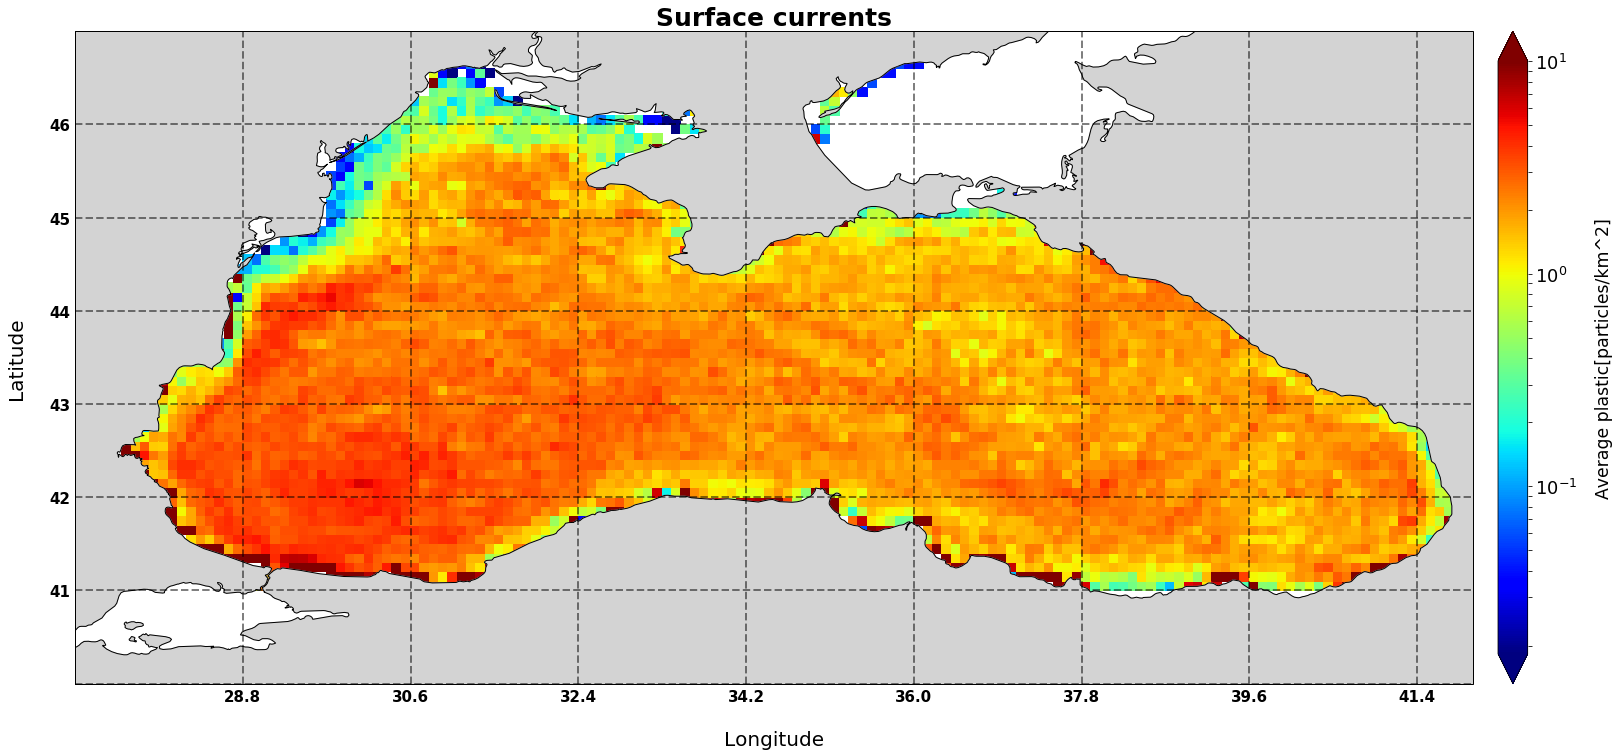

In [6]:
s_lat = [45.221998, 46.511751, 42.183748, 46.081485, 41.608372, 41.754870, 41.136737,
         41.386579, 42.819377, 43.184802, 47.097783]

s_lon = [29.737916, 32.271580, 41.634994, 30.494232, 41.560132, 35.955972, 30.650267,
         36.661469, 41.129852, 40.277446, 39.269342]


D1 = DensityPlot(MD[0], titles[0])
savefig(outdir,r'\DR1')

D1 = DensityPlot(MD[1], titles[1])
savefig(outdir,r'\DR2')

D1 = DensityPlot(MD[2], titles[2])
savefig(outdir,r'\DR4')
